<a href="https://colab.research.google.com/github/AngeloDev-New/AgriVision-IA-e-Segmenta-o-para-An-lise-do-Milho/blob/main/comparativoCNNmobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cloning into 'CNNImplementation'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 35 (delta 16), reused 22 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 14.05 KiB | 14.05 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Total de imagens balanceadas: 23118
Anormal: 11559
Normal: 11559


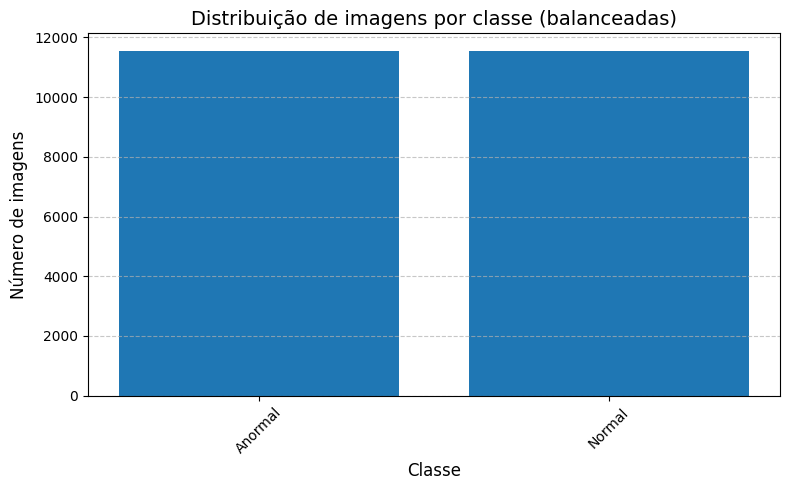

In [ ]:
!rm -rf CNNImplementation/
!git clone https://github.com/AngeloDev-New/CNNImplementation.git
from CNNImplementation.Models import load_model
from CNNImplementation.Dataset import DatasetUnion
from CNNImplementation.Transforms import CropSides
from CNNImplementation.trainer import Trainer

import torchvision.transforms as T
import torch

classes = {
    'Normal':['BI-RADS_1'],
    'Anormal':[ 'BI-RADS_0',
                'BI-RADS_2',
                'BI-RADS_3',
                'BI-RADS_4',
                'BI-RADS_5']
    }

transform = T.Compose([
    CropSides(top=0.20, right=0, bottom=0, left=0),
    T.Resize((224, 224)),
    T.ConvertImageDtype(torch.float),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])
path_dataset = '/content/drive/MyDrive/imagens_separadas'
exepts = []
dataset = DatasetUnion(path_dataset,classes,transform = transform,exepts = exepts )

total = len(dataset)
n_train = 1600
n_val = 400
n_test  = 500

train_set, val_set, test_set = dataset.distribuicao(train = n_train,val = n_val,test = n_test)
dataset.plot()

Treinamento Finalizado
Histórico: 20 epochs anteriores
✔ last.pth carregado


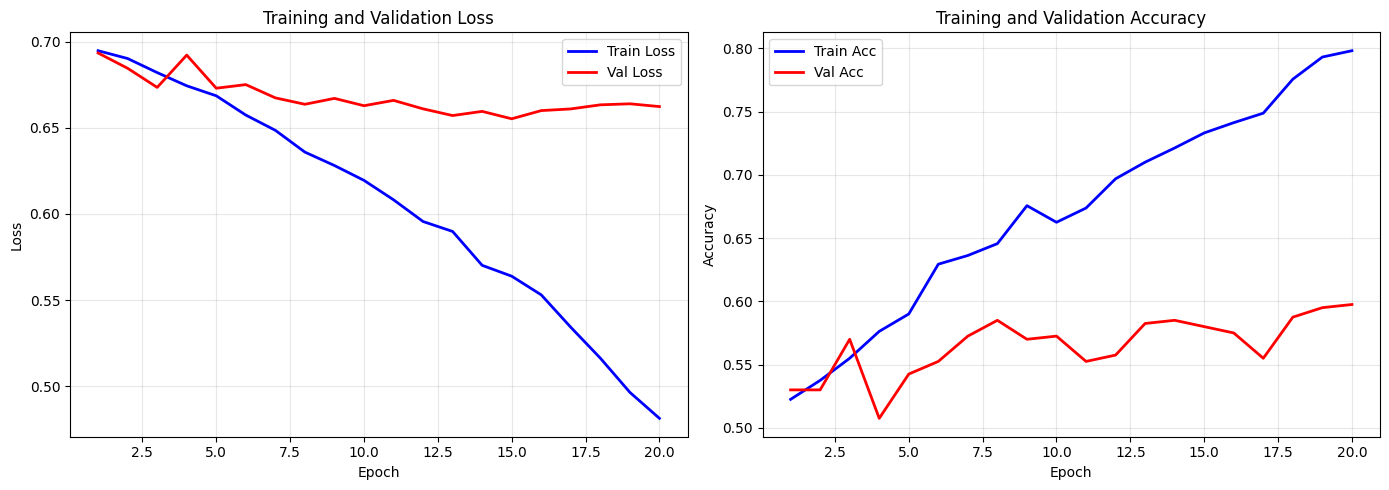

Avaliando com best.pth

Test accuracy: 0.5840


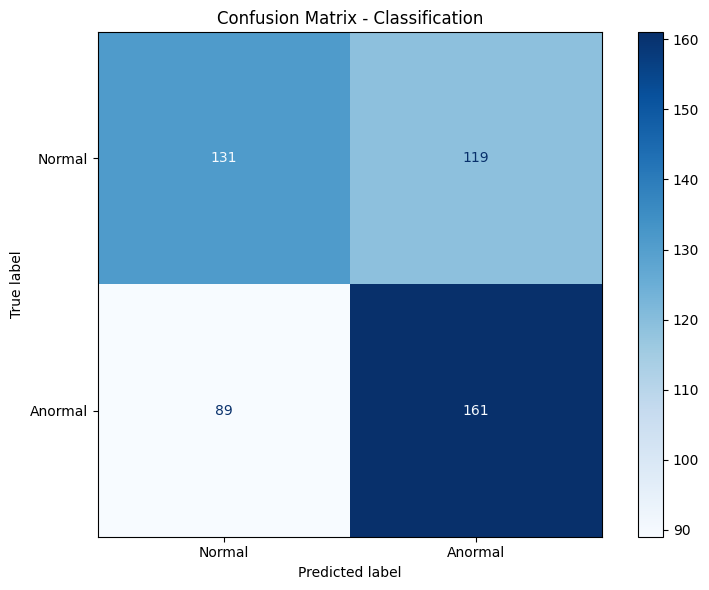

In [ ]:

trainer = Trainer(
    model=load_model('mobilenet_v2'),
    train_set=train_set,
    val_set=val_set,
    test_set=test_set,
    classes=classes,
    models_path="/content/drive/MyDrive/modelosCeonc/mobilenet_v2"
)

trainer.train(num_epochs=50, patience=5)
trainer.plot()
trainer.evaluate()


### **True Normal (linha de cima)**

* **131** → eram *Normals* e o modelo previu *Normal* (acertou)
* **119** → eram *Normals*, mas o modelo previu *Anormal* (errou — falso positivo)

### **True Anormal (linha de baixo)**

* **89** → eram *Anormais*, mas o modelo previu *Normal* (errou — falso negativo)
* **161** → eram *Anormais* e o modelo previu *Anormal* (acertou)

---

### **Acurácia geral**

[
\frac{131 + 161}{131+119+89+161}
= \frac{292}{500}
= 0.584 \approx 58.4%
]

Então sua acurácia é **58%** →  baixo.

---


## **Classe Normal**

* Acertou **131**
* Errou **119**

A sensibilidade para Normal:
[
\frac{131}{131+119} = \frac{131}{250} \approx 52%
]



---

## **Classe Anormal**

* Acertou **161**
* Errou **89**

Sensibilidade para Anormal:
[
\frac{161}{161+89} = \frac{161}{250} \approx 64%
]

O modelo está **um pouco melhor** para pegar anomalias, mas ainda falha bastante.

---

# **4. Interpretação geral**

###**O modelo está enviesado para prever “Anormal”**

Por que?

Porque:

* Ele erra **119 Normais**, chamando de Anormal
* Mas só erra **89 Anormais**, chamando de Normal

Ou seja:
O modelo tende a dizer **Anormal** mesmo quando é Normal.


Treinamento Finalizado
Histórico: 17 epochs anteriores
✔ last.pth carregado


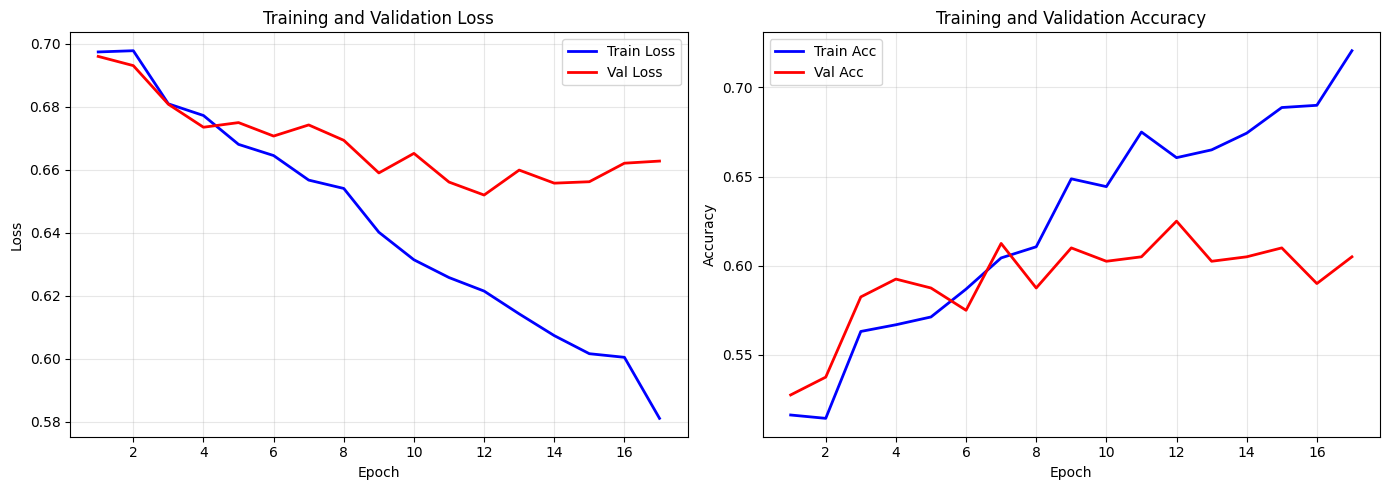

Avaliando com best.pth

Test accuracy: 0.6260


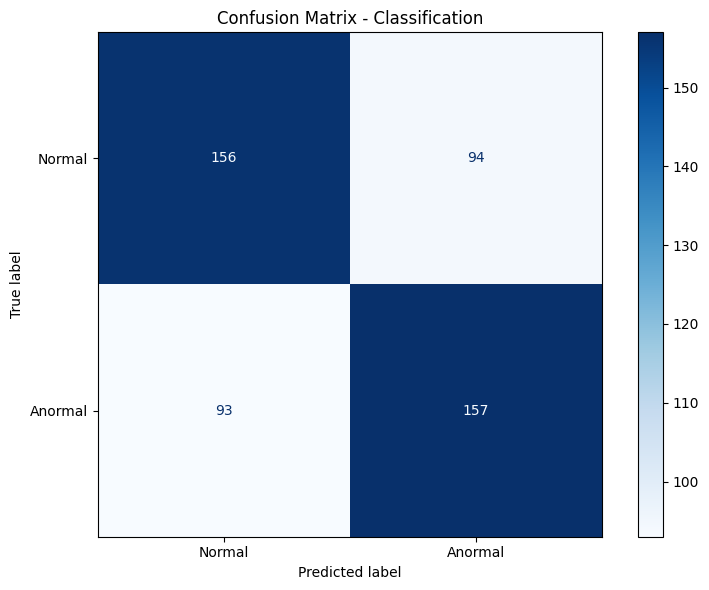

In [ ]:
trainer = Trainer(
    model=load_model('efficientnet_b0'),
    train_set=train_set,
    val_set=val_set,
    test_set=test_set,
    classes=classes,
    models_path="/content/drive/MyDrive/modelosCeonc/efficientnet_b0"
)
trainer.train(num_epochs=50, patience=5)
trainer.plot()
trainer.evaluate()

#**1. Acurácia geral**

[
\text{Acurácia} = \frac{156 + 157}{500}
= \frac{313}{500}
= 0.626 = 62.6%
]

✔ **Acurácia = 62.6%**
Melhor que antes (58%), mas ainda baixa.

---

#**2. Métricas por classe**

## **Classe Normal**

* Acertos: **156**
* Erros: **94**

Sensibilidade (Recall para Normal):

[
\frac{156}{156 + 94}
= \frac{156}{250}
= 0.624 = 62.4%
]

✔ O modelo acerta **62% dos Normais**.

---

## **Classe Anormal**

* Acertos: **157**
* Erros: **93**

Sensibilidade (Recall para Anormal):

[
\frac{157}{157 + 93}
= \frac{157}{250}
= 0.628 = 62.8%
]

✔ O modelo acerta **63% dos Anormais**.

---

#**3. Interpretação geral**

Agora o modelo está **mais equilibrado** do que antes:

| Classe  | Recall    |
| ------- | --------- |
| Normal  | **62.4%** |
| Anormal | **62.8%** |

A diferença entre as classes é mínima → o modelo **não está mais enviesado para prever Anormal**, como antes.

Mas ainda falha **em torno de 37% dos casos em ambas as classes**.

---

### **Métricas**

* **Acurácia**: **62.6%**
* **Recall Normal**: **62.4%**
* **Recall Anormal**: **62.8%**

### **O modelo ainda está fraco**, mas agora:

* Não está mais tendendo para uma classe específica
* Está equilibrado entre Normal e Anormal
* Precisa melhorar generalização → talvez mais dados, augmentations ou um backbone melhor.

---


Treinamento Finalizado
Histórico: 17 epochs anteriores
✔ last.pth carregado


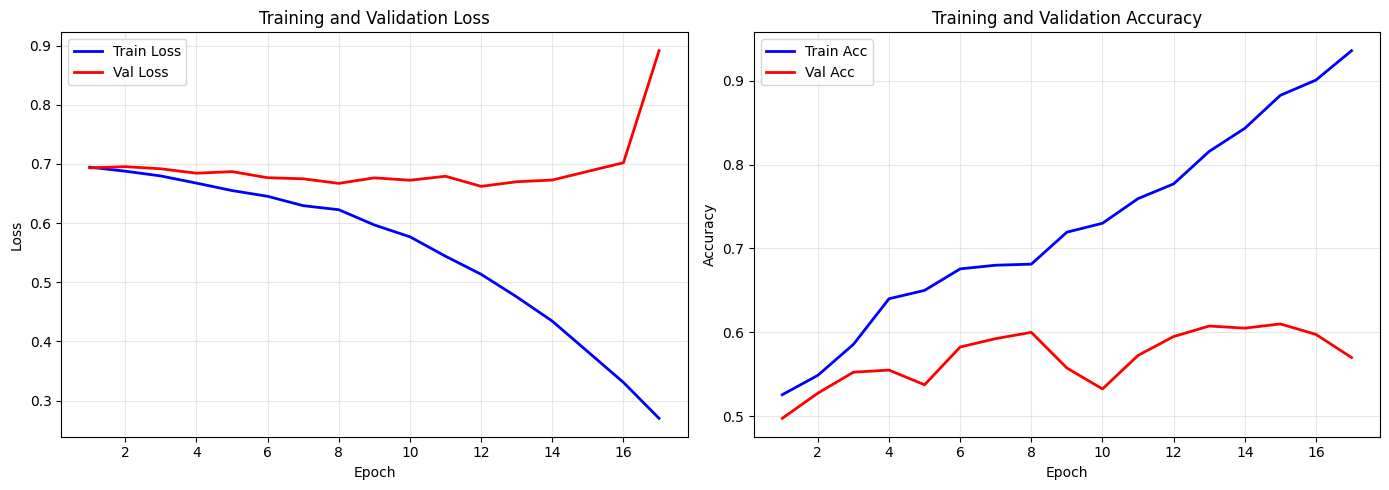

Avaliando com best.pth

Test accuracy: 0.6000


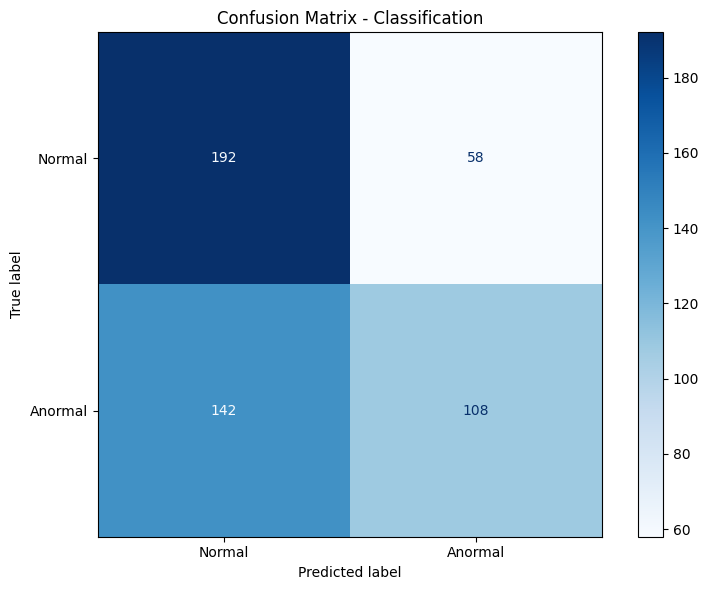

In [ ]:
trainer = Trainer(
    model=load_model('resnet50'),
    train_set=train_set,
    val_set=val_set,
    test_set=test_set,
    classes=classes,
    models_path="/content/drive/MyDrive/resnet50"
)
trainer.train(num_epochs=50, patience=5)
trainer.plot()
trainer.evaluate()

#  **1. Acurácia geral**

[
\text{Acurácia} = \frac{192 + 108}{500}
= \frac{300}{500}
= 0.60 = 60%
]

✔ **Acurácia = 60%**

---

# **2. Métricas por classe**

## **Classe Normal**

* Acertos: **192**
* Erros: **58**

Recall (sensibilidade Normal):

[
\frac{192}{192 + 58}
= \frac{192}{250}
= 0.768 = 76.8%
]

✔ O modelo reconhece **76.8% dos Normais** (muito bom).

---

## **Classe Anormal**

* Acertos: **108**
* Erros: **142**

Recall (sensibilidade Anormal):

[
\frac{108}{108 + 142}
= \frac{108}{250}
= 0.432 = 43.2%
]

O modelo reconhece **só 43% dos Anormais** (bem ruim).

---

# **3. Interpretação geral**

### **O modelo está fortemente enviesado para prever “Normal”.**

Por quê?

* Ele acerta **192 Normais**, mas acerta apenas **108 Anormais**.
* Ele erra **142 Anormais**, dizendo que são Normais.
* Isso significa que o modelo **tem medo de dizer Anormal**.

---

### **Métricas**

* **Acurácia**: **60%**
* **Recall Normal**: **76.8%**
* **Recall Anormal**: **43.2%**

---
